In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import csv
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bank-tele-datacleaning.csv",skiprows=2)
df.head()

In [ ]:
df.info()

In [ ]:
# df.drop("customerid",axis=1, inplace=True)
df.head()

# SPLITTING COLUMN

In [ ]:
df['Job'] = df.jobedu.apply(lambda x:x.split(",")[0])
df["Education"] = df.jobedu.apply(lambda x:x.split(",")[1])

In [ ]:
df["Education"].head()

In [ ]:
df['Job'].head()

# Drop Jobedu column

In [ ]:
df.drop('jobedu',axis=1,inplace=True)

# Handling Missing value

In [ ]:
df.isnull().sum()

In [ ]:
df.age.isnull().sum()

In [ ]:
df1=df[~df.age.isnull()].copy()

In [ ]:
df1.age.isnull().sum()

In [ ]:
df1.month.isnull().sum()

In [ ]:
df1.month.value_counts(normalize=True)

In [ ]:
monthmode = df1.month.mode()[0]

In [ ]:
df1.month.fillna(monthmode,inplace = True)
df1.month.value_counts(normalize = True)

In [ ]:
df1.isnull().sum()

In [ ]:
df1.pdays.describe

<bound method NDFrame.describe of 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
45206      NaN
45207      NaN
45208    184.0
45209      NaN
45210    188.0
Name: pdays, Length: 45191, dtype: float64>

In [ ]:
df1.loc[df1.pdays<0,"pdays"] = np.NaN

In [ ]:
df1.pdays.describe()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.pdays.value_counts()

182.0    167
92.0     146
183.0    126
91.0     126
181.0    116
        ... 
404.0      1
32.0       1
551.0      1
670.0      1
530.0      1
Name: pdays, Length: 557, dtype: int64

In [ ]:
df1.shape

(45191, 20)

# UNIVARIENT ANALYSIS

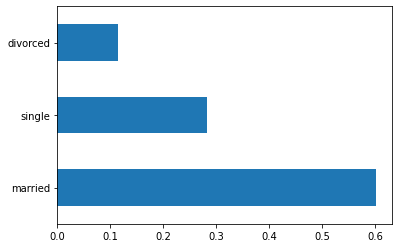

In [ ]:
df1.marital.value_counts(normalize= True).plot.barh()

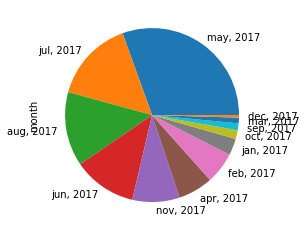

In [ ]:
df1.month.value_counts(normalize=True).plot.pie()

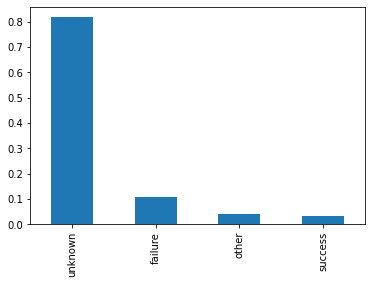

In [ ]:
df1.poutcome.value_counts(normalize= True).plot.bar()

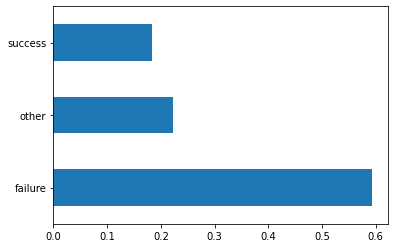

In [ ]:
df1[~(df1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.barh()

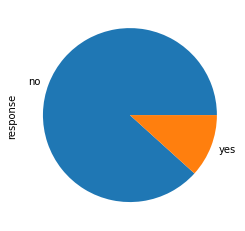

In [ ]:
df1.response.value_counts().plot.pie()

# BIVARIENT ANALYSIS

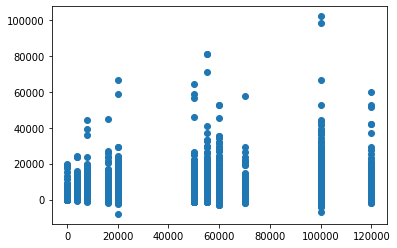

In [ ]:
# NUMERICAL TO NUMERICAL
plt.scatter(df1.salary,df1.balance)
plt.show()

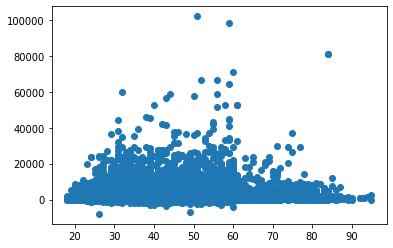

In [ ]:
plt.scatter(df1.age,df1.balance)
plt.show()

In [ ]:
import seaborn as sns

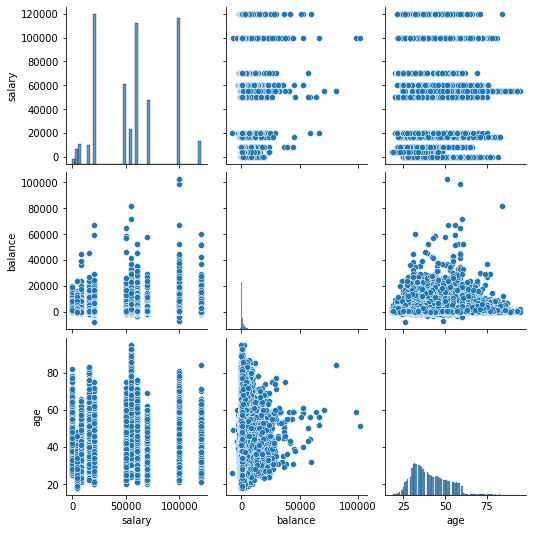

In [ ]:
sns.pairplot(data=df1,vars=['salary','balance','age'])
plt.show()

# CORRELATION HEAT MAP

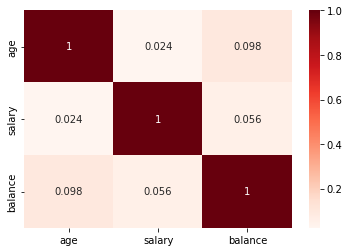

In [ ]:
sns.heatmap(df1[['age','salary','balance']].corr(), annot = True, cmap="Reds")
plt.show()

In [ ]:
df1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

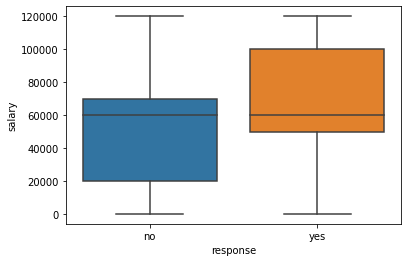

In [ ]:
sns.boxplot(data = df1,x="response",y='salary')
plt.show()

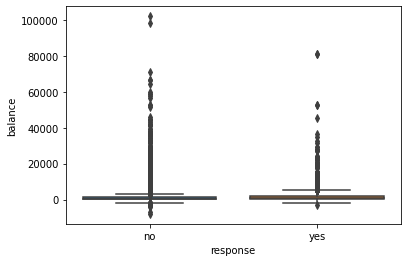

In [ ]:
sns.boxplot(data=df1,x='response', y= 'balance')

In [ ]:
df1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

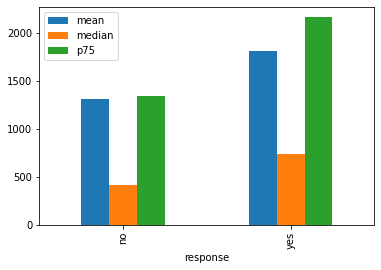

In [ ]:
def p75(x):
  return np.quantile(x,0.75)
df1.groupby("response")['balance'].aggregate(['mean','median',p75]).plot.bar()

# CAT-CAT

In [ ]:
df1["response_flag"]= np.where(df1.response=="yes",1,0)
df1.response_flag.value_counts(normalize= True)

0    0.883052
1    0.116948
Name: response_flag, dtype: float64

In [ ]:
df1.response_flag.mean()

0.11694806488017526

In [ ]:
df1.groupby('Education')['response_flag']

Education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64